In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from typing import List, Optional
# import copy
from collections import defaultdict

df = pd.read_csv('LOBSTER_SampleFile_AMZN_2012-06-21_1/AMZN_2012-06-21_34200000_57600000_message_1.csv')

In [2]:
class Order:
    def __init__(self, orderId, time, bidOrAsk, price, volume, client) -> None:
        self.orderId: int = orderId
        self.datetime: float = time
        self.side: str = bidOrAsk
        self.price: float = price
        self.volume: int = volume
        self.client: str = client

In [3]:
class Node:
    def __init__(self, order) -> None:
        self.item: Order = order
        self.next = None
        self.prev = None

class DoublyLinkedList:
    def __init__(self, new: Node) -> None:
        self.val = new.item.price
        self.head = new
        self.tail = new

    def exists(self) -> bool:
        return bool(self.head)
  
    def prepend(self, data) -> None:
        new = Node(data)
        new.next = self.head

        if self.head:
            self.head.prev = new
            self.head = new
            new.prev = None
            return
        
        self.head = new
        self.tail = new
        new.prev = None
    
    def append(self, new: Node) -> None:
        # new = Node(data)
        new.prev = self.tail

        if not self.tail:
            self.head = new
            self.tail = new
            new.next = None
            return
        
        self.tail.next = new
        new.next = None
        self.tail = new

    def peekFront(self) -> Optional[Order]:
        if self.head: return self.head.item
        return

    def peekBack(self) -> Optional[Order]:
        if self.tail: return self.tail.item
        return
    
    def popleft(self) -> Optional[Order]:
        if not self.head:
            return
        
        if not self.head.next:
            self.head = None
            self.tail = None
            return
        
        temp = self.head
        temp.next.prev = None
        self.head = temp.next
        temp.next = None
        return temp.item
  
    def popright(self) -> Optional[Order]:
        if not self.tail:
            return
        
        if not self.tail.prev:
            self.head = None
            self.tail = None
            return
        
        temp = self.tail
        temp.prev.next = None
        self.tail = temp.prev
        temp.prev = None
        return temp.item

    def remove(self, target) -> None:
        if not self.head or not target:
            return
        
        if self.head == target:
            self.popleft()
        
        if self.tail == target:
            self.popright()

        if target.next:
            target.next.prev = target.prev
        
        if target.prev:
            target.prev.next = target.next
        
        return

    def printDLL(self) -> None:
        if not self.head:
            return

        path = []

        curr = self.head
        while curr:
            path.append(curr.item.price)
            curr = curr.next
        
        print(path)
        return

In [4]:
class Heap:
    def __init__(self) -> None:
        self.heap: List[List[Order]] = []
    
    def _parent(self, i: int): return (i-1)//2
    def _left(self, i: int): return (2*i + 1)
    def _right(self, i: int): return 2*i + 2

    # Helper function to get 'value' of queue at said index
    def _peek(self, i: int): return self.heap[i].val

    def getMin(self) -> Optional[Order]:
        return self.heap[0].head.item if self.heap and self.heap[0].head else None
    
    def getSize(self) -> int:
        return len(self.heap)
    
    def exists(self) -> bool:
        return True if self.heap and self.heap[0].head else False

    def printHeap(self) -> None:
        out = []
        for h in self.heap:
            lvl = []
            curr = h.head
            while curr:
                lvl.append(curr.item.orderId)
                curr = curr.next
            out.append(lvl)
        print(out)
        return


class MinHeap(Heap):
    def __init__(self) -> None:
        super().__init__()

    def heapify(self, i: int) -> None:
        l: int = self._left(i)
        r: int = self._right(i)
        smallest: int = i

        if l < len(self.heap) and self._peek(l) < self._peek(i):
            smallest = l
        if r < len(self.heap) and self._peek(r) < self._peek(smallest):
            smallest = r
        if smallest != i:
            self.heap[i], self.heap[smallest] = self.heap[smallest], self.heap[i]
            self.heapify(smallest)
    
    # Insertion does change, takes in a boolean from hashmap to append to queue else, proceeds similarly
    def insert(self, dll: DoublyLinkedList) -> None:
        self.heap.append(dll)
        i: int = len(self.heap) - 1
        while i != 0 and self._peek(self._parent(i)) > self._peek(i):
            self.heap[i], self.heap[self._parent(i)] = self.heap[self._parent(i)], self.heap[i]
            i = self._parent(i)

#     # popOrder rules delete min obsolete
#     def popOrder(self) -> None:
#         if not self.heap:
#             return

#         last = self.heap[0].popleft()

#         if not self.heap[0].head:
#             a, b = self.heap[0], self.heap[-1]
#             self.heap[0], self.heap[-1] = b, a
# #             self.heap[0] = self.heap[-1]

#             self.heap.pop()
#             self.heapify(0)
#         return

    def remove(self, target: DoublyLinkedList) -> None:
        # O (n)
        if not self.heap:
            return
        for i in range(len(self.heap)):
            if self.heap[i] == target:
                break
#         print(self.heap)
        self.heap[i] = self.heap[-1]
#         temp = self.heap[-1]
#         target = copy.deepcopy(self.heap[-1])
#         print(self.heap)
#         target = self.heap[-1]
        self.heap.pop()
        self.heapify(0)

class MaxHeap(Heap):
    def __init__(self) -> None:
        super().__init__()

    def heapify(self, i: int) -> None:
        l: int = self._left(i)
        r: int = self._right(i)
        largest: int = i

        # self.loc[self._peek(i)] = i

        if l < len(self.heap) and self._peek(l) > self._peek(i):
            largest = l
        if r < len(self.heap) and self._peek(r) > self._peek(largest):
            largest = r
        if largest != i:
            self.heap[i], self.heap[largest] = self.heap[largest], self.heap[i]
            self.heapify(largest)
    
    
    # Insertion does change, takes in a boolean from hashmap to append to queue else, proceeds similarly
    def insert(self, dll: DoublyLinkedList) -> None:
        self.heap.append(dll)
        i: int = len(self.heap) - 1
        while i != 0 and self._peek(self._parent(i)) < self._peek(i):
            self.heap[i], self.heap[self._parent(i)] = self.heap[self._parent(i)], self.heap[i]
            i = self._parent(i)


    # popOrder rules delete min obsolete
#     def popOrder(self) -> None:
#         if not self.heap:
#             return

#         last = self.heap[0].popleft()

#         if not self.heap[0].head:
#             a, b = self.heap[0], self.heap[-1]
#             self.heap[0], self.heap[-1] = b, a
# #             self.heap[0] = self.heap[-1]

#             self.heap.pop()
#             self.heapify(0)
#         return

    def remove(self, target: DoublyLinkedList) -> None:
        # O (n)
        if not self.heap:
            return
        
        for i in range(len(self.heap)):
            if self.heap[i] == target:
                break
#         print(self.heap)
        self.heap[i] = self.heap[-1]
#         temp = self.heap[-1]
#         target = copy.deepcopy(self.heap[-1])
#         print(self.heap)
#         target = self.heap[-1]
        self.heap.pop()
        self.heapify(0)



In [5]:
class OrderBook:
    def __init__(self) -> None:
        self.bestBid: MaxHeap = MaxHeap() # max heap
        self.bestAsk: MinHeap = MinHeap() # min heap
        self.orderMap: dict = {}
        self.volumeMap: dict = defaultdict(dict) # price // side // vol
        self.queueMap: dict = defaultdict(dict) # price // side // queue #DONT UNDERSTAND
        self.txct: int = 0

    
    def _crossedTrade(self, book, order) -> bool:
        if book.exists():
            if order.side == 'BID':
                if order.price >= book._peek(0): 
                    return True
            else:
                if order.price <= book._peek(0): 
                    return True
        return False


    def placeOrder(self, order: Order) -> None:
        oppBook = self.bestAsk if order.side == 'BID' else self.bestBid
        sameBook = self.bestBid if order.side == 'BID' else self.bestAsk

#         self.orderMap[order.orderId] = Node(order)
# 
        while order.volume > 0 and self._crossedTrade(oppBook, order):
#             print(oppBook.printHeap())
            
            matchedOrder = oppBook.getMin()

            self.txct += 1

            txPrice, txVolume = matchedOrder.price, min(order.volume, matchedOrder.volume) # add client side interaction here
            
            matchedOrder.volume -= txVolume
            order.volume -= txVolume

            self.volumeMap[txPrice][matchedOrder.side] -= txVolume

            if matchedOrder.volume == 0: 
                self.cancelOrder(matchedOrder.orderId)
#                 oppBook.popOrder()
#                 del self.orderMap[matchedOrder.orderId]

        if order.volume > 0:
            self._placeResting(order, sameBook)
    
    def _placeResting(self, order, book) -> None: # Figure out the deal with queue map and heap
        
        self.orderMap[order.orderId] = Node(order)

        if order.price not in self.queueMap or order.side not in self.queueMap[order.price]:
            self.queueMap[order.price][order.side] = DoublyLinkedList(self.orderMap[order.orderId]) # [order] # DoublyLinkedList(order)
            book.insert(self.queueMap[order.price][order.side])
            self.volumeMap[order.price][order.side] = order.volume
        else:
            self.queueMap[order.price][order.side].append(self.orderMap[order.orderId]) # DLL
            self.volumeMap[order.price][order.side] += order.volume
    
    def cancelOrder(self, orderId) -> None:
        if orderId in self.orderMap:
            orderNode = self.orderMap[orderId]
            order = orderNode.item
            priceQueue = self.queueMap[order.price][order.side]
            priceQueue.remove(orderNode)
            if not priceQueue.exists():
#                 print('endlvl')
                sameBook = self.bestBid if order.side == 'BID' else self.bestAsk
#                 if order.side == 'BUY':
#                     sameBook.printHeap()
#                     print('new')
                sameBook.remove(priceQueue) # add O(log n) heap removal DONE
#                 if order.side == 'BUY':
#                     sameBook.printHeap()
#                 sameBook.remove(self.queueMap[order.price][order.side]) # add O(log n) heap removal DONE
                del self.queueMap[order.price][order.side]
            self.volumeMap[order.price][order.side] -= order.volume
            del self.orderMap[orderId]
    
    def executeOrder(self, orderId) -> None:
        '''
        To do: add client side handling to update balances
        '''
        self.cancelOrder(orderId)
    
    def partialCancel(self, orderId, volume) -> None:
        if orderId in self.orderMap:
            order = self.orderMap[orderId].item
            order.volume -= volume
            self.volumeMap[order.price][order.side] -= order.volume

    def getVolumeAtPrice(self, price, side):
        return self.volumeMap[price][side]


In [6]:
book = OrderBook()

data = []
ct = 0 
for i in range(len(df)):

    row = df.iloc[i]
    if row.Type == 1:
#         ct += 1
#         print(ct)
        # if book.bestAsk.getMin():
        #     print(book.bestAsk.heap[0].printDLL())
        #     print(book.bestAsk.heap[0].popleft())
        # print(row.Type)
        curr = Order(row.OrderId, row.Time, ('BID' if row.Direction == 1 else 'ASK'), row.Price, row.Size, 'market')
        book.placeOrder(curr)
    elif row.Type == 2:
        book.partialCancel(row.OrderId, row.Size)
    elif row.Type == 3:
        book.cancelOrder(row.OrderId)
    elif row.Type == 4:
        # Execution of visible
        book.executeOrder(row.OrderId)
    elif row.Type == 5:
        # Execution of hidden
        continue
    elif row.Type == 7:
        # Halts
        continue
    
        
    bestAsk = book.bestAsk.getMin()
    bestBid = book.bestBid.getMin()
# 
    bookListing = [row.Time]

#         book.bestAsk.printHeap()
#         book.bestBid.printHeap()
#         print('\n')
#         print(bestAsk, bestBid)

    if bestAsk and bestBid:
        bookListing.append(bestAsk.price)
        bookListing.append(book.volumeMap[bestAsk.price]['ASK'])

        bookListing.append(bestBid.price)
        bookListing.append(book.volumeMap[bestBid.price]['BID'])
        # bookListing.append(book.txct)

        data.append(bookListing)

In [7]:
assert type(book.bestBid) is MaxHeap

In [8]:
import numpy as np
print(ct)
newdf = pd.DataFrame(data=data, columns=['Tick','Ask', 'AV', 'Bid', 'BVol'])
newdf['Mid'] = np.vectorize(lambda a,b: (a+b)/2)(newdf['Ask'], newdf['Bid'])
# newdf.head(10)
print(newdf)

0
              Tick        Ask     AV        Bid   BVol        Mid
0      34200.87379  2239500.0   75.0  2238400.0  100.0  2238950.0
1      34200.88178  2239500.0   75.0  2238400.0  100.0  2238950.0
2      34200.89150  2240000.0  100.0  2238400.0  100.0  2239200.0
3      34201.29095  2238600.0  100.0  2238400.0  100.0  2238500.0
4      34201.29141  2240000.0  100.0  2238400.0  100.0  2239200.0
...            ...        ...    ...        ...    ...        ...
54763  57599.54583  2206300.0  100.0  2205800.0  147.0  2206050.0
54764  57599.54583  2206300.0  100.0  2205800.0  147.0  2206050.0
54765  57599.90399  2206300.0  100.0  2205800.0  147.0  2206050.0
54766  57599.95824  2206300.0  200.0  2205800.0  147.0  2206050.0
54767  57599.95936  2206300.0  100.0  2205800.0  147.0  2206050.0

[54768 rows x 6 columns]


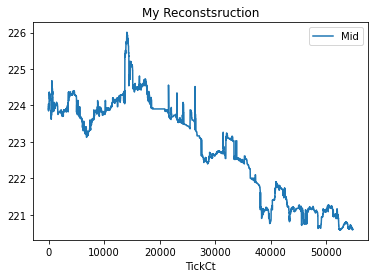

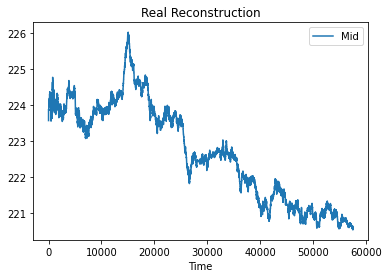

In [9]:
newdf.to_csv('add_cancel.csv')
newdf['Mid'] = np.vectorize(lambda a: a/10000)(newdf['Mid']) 
newdf['TickCt'] = newdf.index
newdf.plot(x='TickCt', y='Mid', kind='line')
plt.title('My Reconstsruction')
plt.show()

real_df = pd.read_csv('LOBSTER_SampleFile_AMZN_2012-06-21_1/AMZN_2012-06-21_34200000_57600000_orderbook_1.csv')
real_df['Time'] = real_df.index
real_df['Mid'] = np.vectorize(lambda a,b: (a+b)/2)(real_df['BestAsk'], real_df['BestBid'])
real_df['Mid'] = np.vectorize(lambda a: a/10000)(real_df['Mid'])
real_df.plot(x='Time', y='Mid')
plt.title('Real Reconstruction')
plt.show()

In [10]:
print(df.columns)

Index(['Time', 'Type', 'OrderId', 'Size', 'Price', 'Direction'], dtype='object')
